In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
import matplotlib.pyplot as plt
import time
def elapsed(sec):
    if sec < 60:
        return "{:.2f}".format(sec) + " sec"
    elif sec < (60 * 60):
        return "{:.2f}".format(sec / 60) + " min"
    else:
        return "{:.2f}".format(sec / (60 * 60)) + " hr"
def showimg(img):
    plt.figure("Image")
    plt.imshow(img,cmap='gray')
    plt.axis('on')
    plt.title('image')
    plt.show()

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
HIDDEN_SIZE=512
INPUT_SIZE_IN=28
INPUT_SIZE_OUT=784
INPUT_NUMBER=128
NUM_LAYERS=2
TIMESTEPS=28

In [4]:
def LstmCell(HIDDEN_SIZE):
    # lstm_cell = rnn.BasicLSTMCell(HIDDEN_SIZE)
    lstm_cell = rnn.GRUCell(HIDDEN_SIZE)
    return lstm_cell


def RNN(x, weights, biases, HIDDEN_SIZE, TIMESTEPS, NUM_LAYERS):
    x = tf.reshape(x, [-1, TIMESTEPS])
    x = tf.split(x, TIMESTEPS, 1)
    rnn_cell = rnn.MultiRNNCell([LstmCell(HIDDEN_SIZE) for _ in range(NUM_LAYERS)])
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)
    return tf.matmul(outputs[-1], weights['out']) + biases['out']


def RNN_onehot_in(x, weights, biases, HIDDEN_SIZE, INPUT_SIZE_IN, TIMESTEPS, NUM_LAYERS):
    x = tf.transpose(x, [1, 0, 2])
    x = tf.reshape(x, [-1, INPUT_SIZE_IN])
    x = tf.matmul(x, weights['in']) + biases['in']
    x = tf.split(x, TIMESTEPS, 0)
    rnn_cell = rnn.MultiRNNCell([LstmCell(HIDDEN_SIZE) for _ in range(NUM_LAYERS)])
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)
    y=tf.matmul(outputs[-1], weights['out']) + biases['out']
    cache={'x':x,'outputs':outputs,'states':states}
    return y,cache

In [5]:
batch_xs, batch_ys = mnist.train.next_batch(INPUT_NUMBER)

In [6]:
learning_rate=0.0001

In [7]:
x = tf.placeholder("float", [None, TIMESTEPS, INPUT_SIZE_IN])
labels=tf.placeholder(tf.float32, [None, 784])

weights = {
    'out': tf.Variable(tf.random_normal([HIDDEN_SIZE, INPUT_SIZE_OUT])),
    'in': tf.Variable(tf.random_normal([INPUT_SIZE_IN, HIDDEN_SIZE]))
}
biases = {
    'out': tf.Variable(tf.random_normal([INPUT_SIZE_OUT])),
    'in': tf.Variable(tf.random_normal([HIDDEN_SIZE]))
}

sess = tf.InteractiveSession()
y,cache = RNN_onehot_in(x, weights, biases, HIDDEN_SIZE, INPUT_SIZE_IN, TIMESTEPS, NUM_LAYERS)
loss=tf.losses.mean_squared_error(labels,y)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
inp=batch_xs.reshape(-1,28,28)

In [11]:
cost=1
i=0
start_time=time.time()
while cost>0.0001:
    unuse,cost=sess.run([optimizer,loss],feed_dict={x:inp,labels:batch_xs})
    if i % 1000==0:
        print(cost)
    if i==500:
        tpi=(time.time() - start_time)/500
        print('TPI:'+str(tpi)+'sec')
    i+=1
print('ITERATION:'+str(i))
print("Elapsed time: ", elapsed(time.time() - start_time))

9.740643e-05
ITERATION:1
Elapsed time:  0.07 sec


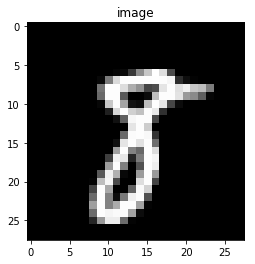

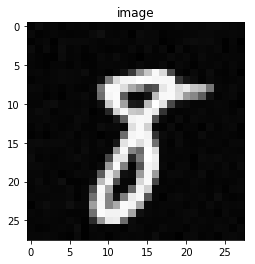

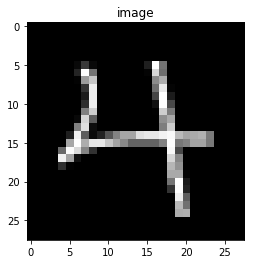

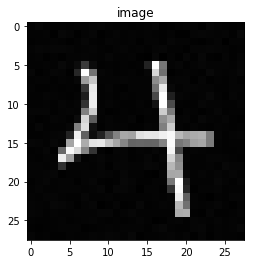

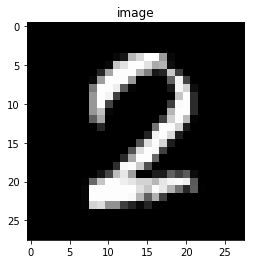

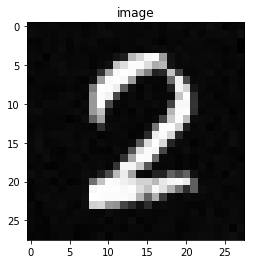

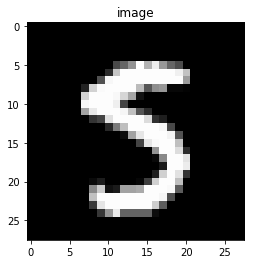

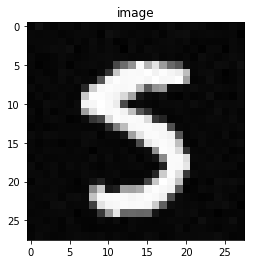

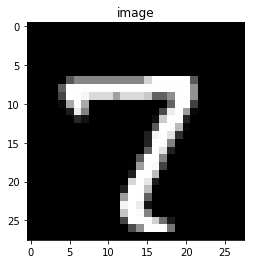

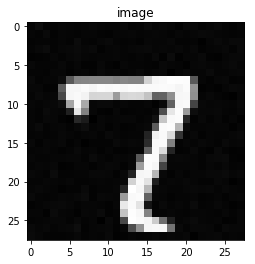

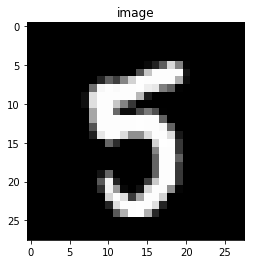

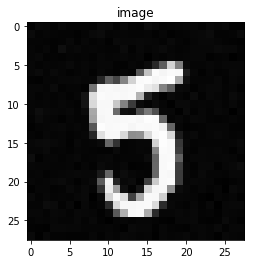

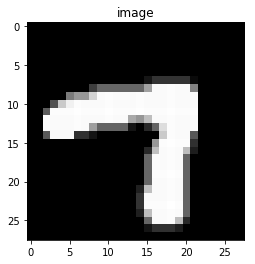

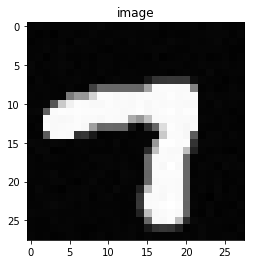

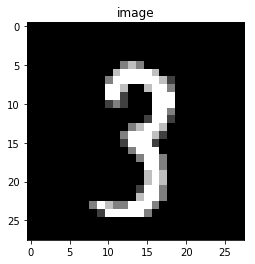

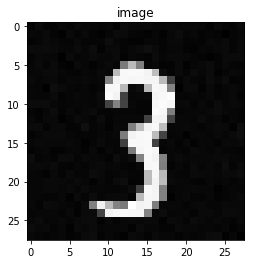

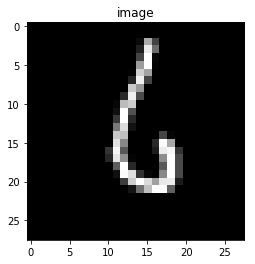

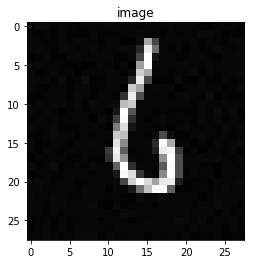

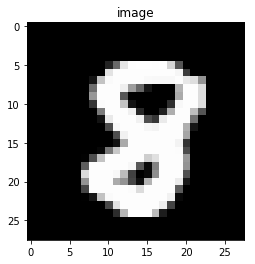

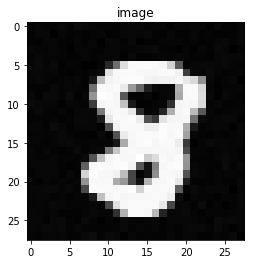

In [12]:
for i in range(40,50):
    oupt=sess.run(y,feed_dict={x:inp[i].reshape(1,28,28)})
    showimg(inp[i])
    showimg(oupt.reshape(28,28))